PID Issues Notebook
* 26 October, 2024

Tutors:
* Dr. Christopher Lum
  * [University of Washington Webpage](http://faculty.washington.edu/lum/EducationalVideos.htm)
  * [Practical Implementation Issues with a PID Controller - YouTube](https://youtu.be/yr6om0e0oAQ?si=Sefee8Wn_NF5Xuda)
* Anthropic's AI Claude

# Low Pass Filter Technical Reference

## Basic Description
A low pass filter (LPF) attenuates high-frequency components of a signal while allowing low-frequency components to pass through relatively unchanged. The filter's response is characterized by specific mathematical relationships between input and output signals.

## Key Equations

### Transfer Function (s-domain)
```
H(s) = ωc/(s + ωc)
```
where s is the complex frequency parameter and ωc is the cutoff frequency in radians/second.

### Frequency Response (magnitude)
```
|H(jω)| = 1/√(1 + (ω/ωc)²)
```
where ω is the input frequency and |H(jω)| is the magnitude response.

### Phase Response
```
φ(ω) = -arctan(ω/ωc)
```
where φ(ω) is the phase shift at frequency ω.

### Cutoff Frequency Relationship
```
fc = ωc/(2π)
```
where fc is the cutoff frequency in Hz.

### First-Order RC Filter
```
fc = 1/(2πRC)
```
where R is resistance in ohms and C is capacitance in farads.

### Time Domain Response (step input)
```
v(t) = V(1 - e^(-t/RC))
```
where V is the input step amplitude.

## Implementation Forms

### Digital Domain (Discrete Time)
First-order difference equation:
```
y[n] = αx[n] + (1-α)y[n-1]
```
where:
- x[n] is the input signal
- y[n] is the output signal
- α is the smoothing factor (0 < α < 1)

## Glossary of Terms and Symbols

| Symbol/Term | Description | Units |
|------------|-------------|--------|
| ωc | Cutoff frequency | radians/second |
| fc | Cutoff frequency | Hertz (Hz) |
| s | Complex frequency parameter | - |
| ω | Angular frequency | radians/second |
| H(s) | Transfer function | - |
| φ(ω) | Phase response | radians |
| R | Resistance | Ohms (Ω) |
| C | Capacitance | Farads (F) |
| α | Smoothing factor (digital) | - |
| τ | Time constant (RC) | seconds |
| Roll-off | Rate of attenuation above cutoff | dB/octave |
| Order (n) | Filter complexity/steepness | dimensionless |

## Filter Characteristics by Order

| Order | Roll-off Rate | Phase Shift at fc |
|-------|--------------|-------------------|
| 1st | -20 dB/decade | -45° |
| 2nd | -40 dB/decade | -90° |
| 3rd | -60 dB/decade | -135° |
| 4th | -80 dB/decade | -180° |

## Filter Types and Characteristics

| Filter Type | Magnitude Response | Phase Response | Typical Use |
|-------------|-------------------|----------------|-------------|
| Butterworth | Maximally flat | Moderate | General purpose |
| Chebyshev I | Steeper roll-off, ripple in passband | Poor | When sharp cutoff needed |
| Bessel | Gentle roll-off | Excellent | When phase linearity critical |
| Elliptic | Steepest roll-off, ripple in both bands | Poor | Maximum attenuation |

## Design Considerations

1. Performance Metrics:
   - Passband ripple (dB)
   - Stopband attenuation
   - Phase response
   - Group delay
   - Settling time

2. Common Trade-offs:
   - Sharper cutoff → More phase distortion
   - Higher order → Better attenuation but more complexity
   - Wider transition band → Better phase response
   - Lower cutoff → Longer settling time

3. Implementation Factors:
   - Component tolerance (analog)
   - Numerical precision (digital)
   - Computational efficiency
   - Memory requirements
   - Group delay considerations

Note: This script requires numpy, matplotlib, and scipy libraries.
You can install them using: pip install numpy matplotlib scipy

Multi-Stage Signal Processing with Low Pass Filter


Signal Processing Parameters:
Enter noise amplitude (0-1): 0.5
Enter low pass filter cutoff frequency (0-10 Hz): 5


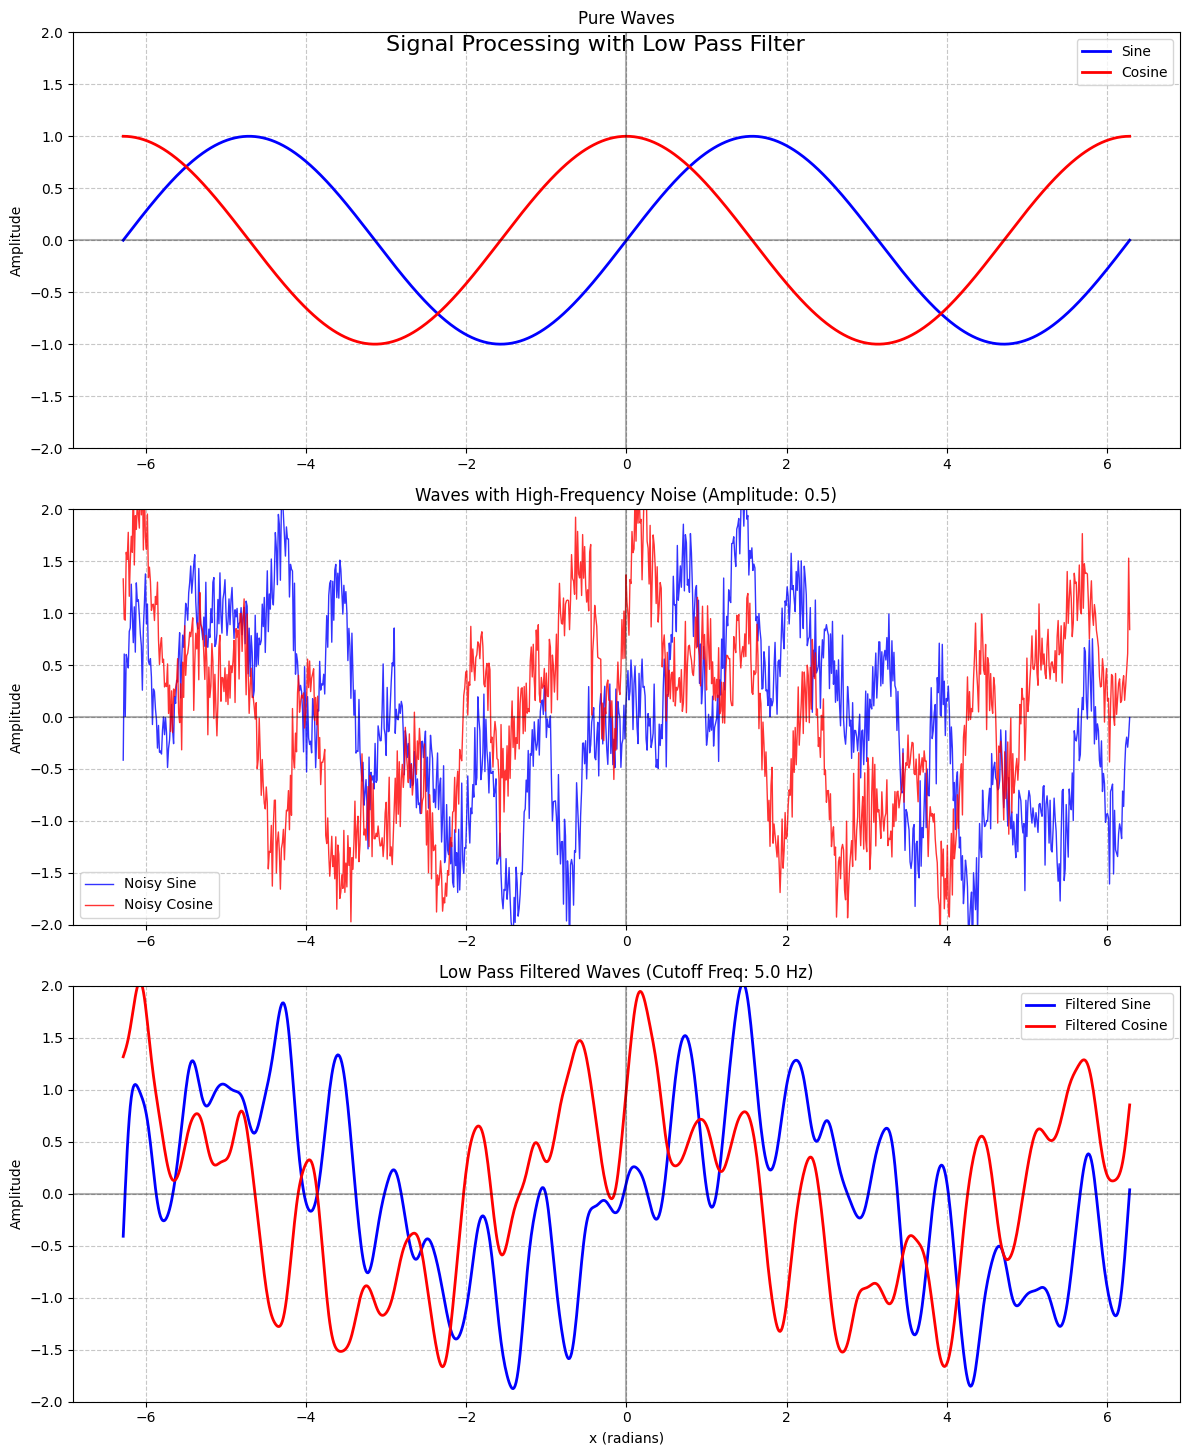

In [1]:
"""
Abstract:
This script visualizes three stages of signal processing: pure waves, waves with noise,
and low-pass filtered noisy waves. It uses subplots to display all stages simultaneously
for easy comparison. The low pass filter demonstrates noise reduction by attenuating
high-frequency components while preserving the fundamental wave shapes. Users can
customize noise levels and filter parameters.

Author: Claude
Date: October 26, 2024
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sys

def get_float_input(prompt, min_val=0, max_val=1):
    """
    Helper function to get valid float input from user.

    Parameters:
    -----------
    prompt : str
        Question to ask user
    min_val : float
        Minimum acceptable value
    max_val : float
        Maximum acceptable value

    Returns:
    --------
    float : User's validated input
    """
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid number")

def apply_low_pass_filter(signal_data, cutoff_freq, fs=100):
    """
    Apply a low pass filter to the input signal.

    Parameters:
    -----------
    signal_data : array
        Input signal to filter
    cutoff_freq : float
        Cutoff frequency in Hz
    fs : float
        Sampling frequency in Hz

    Returns:
    --------
    array : Filtered signal
    """
    nyquist = fs * 0.5
    normalized_cutoff_freq = cutoff_freq / nyquist
    b, a = signal.butter(4, normalized_cutoff_freq, btype='low')
    return signal.filtfilt(b, a, signal_data)

def plot_waves():
    """
    Main function to generate and display waves in three stages:
    1. Pure waves
    2. Waves with noise
    3. Low-pass filtered noisy waves
    """
    # Get user parameters
    print("\nSignal Processing Parameters:")
    noise_amplitude = get_float_input("Enter noise amplitude (0-1): ", 0, 1)
    cutoff_freq = get_float_input("Enter low pass filter cutoff frequency (0-10 Hz): ", 0, 10)

    # Generate base data
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    sine_wave = np.sin(x)
    cosine_wave = np.cos(x)

    # Generate noise (using higher frequency noise to demonstrate low pass filtering)
    t = np.linspace(0, 1, len(x))
    high_freq_noise_sine = noise_amplitude * (np.sin(2*np.pi*20*t) +
                                            np.sin(2*np.pi*15*t) +
                                            np.random.normal(0, 0.5, len(x)))
    high_freq_noise_cosine = noise_amplitude * (np.sin(2*np.pi*18*t) +
                                              np.sin(2*np.pi*12*t) +
                                              np.random.normal(0, 0.5, len(x)))

    # Create noisy waves
    noisy_sine = sine_wave + high_freq_noise_sine
    noisy_cosine = cosine_wave + high_freq_noise_cosine

    # Apply filters
    filtered_sine = apply_low_pass_filter(noisy_sine, cutoff_freq)
    filtered_cosine = apply_low_pass_filter(noisy_cosine, cutoff_freq)

    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('Signal Processing with Low Pass Filter', fontsize=16, y=0.95)

    # Plot 1: Pure Waves
    ax1.plot(x, sine_wave, label='Sine', color='blue', linewidth=2)
    ax1.plot(x, cosine_wave, label='Cosine', color='red', linewidth=2)
    ax1.set_title('Pure Waves', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_ylabel('Amplitude', fontsize=10)
    ax1.legend(fontsize=10)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_ylim(-2, 2)

    # Plot 2: Noisy Waves
    ax2.plot(x, noisy_sine, label='Noisy Sine', color='blue', linewidth=1, alpha=0.8)
    ax2.plot(x, noisy_cosine, label='Noisy Cosine', color='red', linewidth=1, alpha=0.8)
    ax2.set_title(f'Waves with High-Frequency Noise (Amplitude: {noise_amplitude})',
                 fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_ylabel('Amplitude', fontsize=10)
    ax2.legend(fontsize=10)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax2.set_ylim(-2, 2)

    # Plot 3: Filtered Waves
    ax3.plot(x, filtered_sine, label='Filtered Sine', color='blue', linewidth=2)
    ax3.plot(x, filtered_cosine, label='Filtered Cosine', color='red', linewidth=2)
    ax3.set_title(f'Low Pass Filtered Waves (Cutoff Freq: {cutoff_freq} Hz)',
                 fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.set_xlabel('x (radians)', fontsize=10)
    ax3.set_ylabel('Amplitude', fontsize=10)
    ax3.legend(fontsize=10)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax3.set_ylim(-2, 2)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Additional required imports notification
    print("Note: This script requires numpy, matplotlib, and scipy libraries.")
    print("You can install them using: pip install numpy matplotlib scipy")
    print("\nMulti-Stage Signal Processing with Low Pass Filter\n")

    try:
        plot_waves()
    except KeyboardInterrupt:
        print("\nProgram terminated by user.")
    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")